## Perkenalan Dataset

Sumber Dataset : https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

Variabel pada dataset :

* Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
* Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
* Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
* Precipitation (%) (numeric): The precipitation percentage, including outlier values.
* Cloud Cover (categorical): The cloud cover description.
* Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
* UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
* Season (categorical): The season during which the data was recorded.
* Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
* Location (categorical): The type of location where the data was recorded.
* Weather Type (categorical): The target variable for classification, indicating the weather type.

## Import Library

In [ ]:
import numpy as np
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt

## Memuat Dataset

In [ ]:
df = pd.read_csv("/content/weather_classification_data.csv")

In [ ]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.columns = df.columns.str.replace(' ', '_')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind_Speed            13200 non-null  float64
 3   Precipitation_(%)     13200 non-null  float64
 4   Cloud_Cover           13200 non-null  object 
 5   Atmospheric_Pressure  13200 non-null  float64
 6   UV_Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility_(km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather_Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(12540, 11)
(660, 11)


In [ ]:
train_df.Weather_Type.value_counts()

,count
Weather_Type,
Cloudy,3156
Rainy,3135
Sunny,3132
Snowy,3117


Menyeimbangkan jumlah data.

In [ ]:
df_1 = train_df[(train_df.Weather_Type == "Cloudy")]
df_2 = train_df[(train_df.Weather_Type == "Rainy")]
df_3 = train_df[(train_df.Weather_Type == "Sunny")]
df_4 = train_df[(train_df.Weather_Type == "Snowy")]

In [ ]:
from sklearn.utils import resample

df_1_undersampled = resample(df_1, n_samples=3117, random_state=42)
df_2_undersampled = resample(df_2, n_samples=3117, random_state=42)
df_3_undersampled = resample(df_3, n_samples=3117, random_state=42)
print(df_1_undersampled.shape)
print(df_2_undersampled.shape)
print(df_3_undersampled.shape)

(3117, 11)
(3117, 11)
(3117, 11)


Pada dataset ini, digunakan undersampling.

In [ ]:
from sklearn.utils import shuffle

undersampled_train_df = pd.concat([df_4, df_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_2_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_3_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Temperature,Humidity,Wind_Speed,Precipitation_(%),Cloud_Cover,Atmospheric_Pressure,UV_Index,Season,Visibility_(km),Location,Weather_Type
8698,-17.0,79,11.0,17.0,partly cloudy,859.71,10,Autumn,14.0,mountain,Sunny
9101,11.0,78,19.0,64.0,overcast,1018.65,2,Summer,2.0,inland,Rainy
6914,37.0,45,9.5,13.0,clear,1025.50,10,Winter,5.5,coastal,Sunny
9170,24.0,92,8.5,52.0,overcast,998.62,3,Spring,3.5,inland,Rainy
3900,25.0,58,6.5,45.0,partly cloudy,1014.90,4,Autumn,8.5,coastal,Cloudy


Dataset dibagi menjadi data train dan testing berdasarkan data yang sudah diseimbangkan.

In [ ]:
X_train = undersampled_train_df.drop(columns="Weather_Type", axis=1)
y_train = undersampled_train_df["Weather_Type"]

X_test = test_df.drop(columns="Weather_Type", axis=1)
y_test = test_df["Weather_Type"]

In [ ]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "/content/drive/MyDrive/preprocessing/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "/content/drive/MyDrive/preprocessing/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "/content/drive/MyDrive/preprocessing/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "/content/drive/MyDrive/preprocessing/encoder_{}.joblib".format(feature))
        return df

In [ ]:
numerical_columns = [
    'Temperature',
    'Humidity',
    'Wind_Speed',
    'Precipitation_(%)',
    'Atmospheric_Pressure',
    'UV_Index',
    'Visibility_(km)'
]

categorical_columns = [
    'Cloud_Cover',
    'Season',
    'Location'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "/content/drive/MyDrive/preprocessing/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

In [ ]:
pca_numerical_columns_1 = [
    'Temperature',
    'Humidity',
    'Wind_Speed',
    'UV_Index',
    'Visibility_(km)'
]

pca_numerical_columns_2 = [
    'Precipitation_(%)',
    'Atmospheric_Pressure'
]

Melakukan proses PCA.

In [ ]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

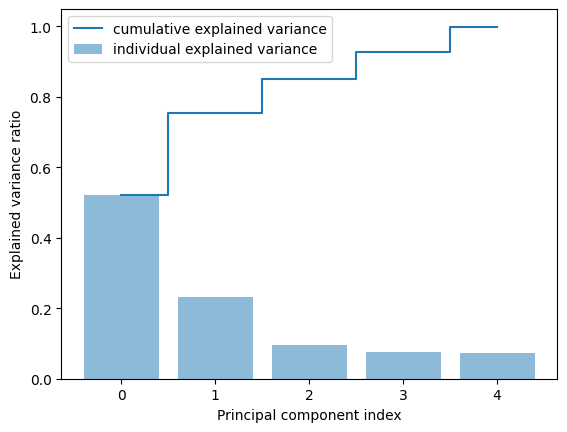

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "/content/drive/MyDrive/preprocessing/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Precipitation_(%),Cloud_Cover,Atmospheric_Pressure,Season,Location,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.128440,3,0.536067,3,0,-0.022752,-0.282516,0.155046,-0.003787,0.121251
1,0.174312,3,0.568926,0,1,0.657071,-0.024082,-0.050536,-0.058433,-0.016893
2,0.064220,0,0.555542,0,1,0.338513,-0.158048,0.096129,0.019584,0.030060
3,0.605505,2,0.525665,2,0,-0.361788,0.124899,0.041890,0.013385,0.109524
4,0.715596,3,0.480876,0,1,-0.262352,0.085351,0.078093,-0.047984,-0.020643


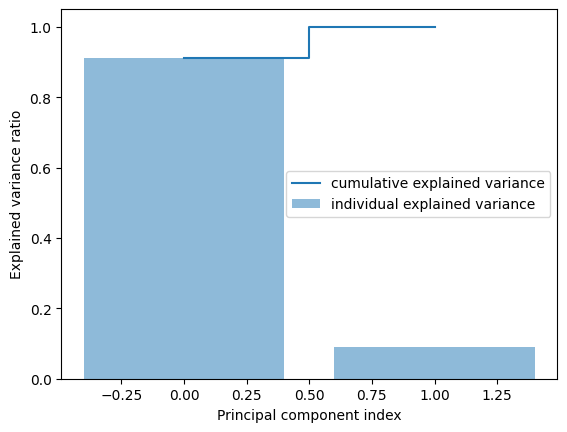

In [ ]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "/content/drive/MyDrive/preprocessing/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Cloud_Cover,Season,Location,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,3,3,0,-0.022752,-0.282516,0.155046,-0.003787,0.121251,-0.365056,-0.001515
1,3,0,1,0.657071,-0.024082,-0.050536,-0.058433,-0.016893,-0.321278,0.034086
2,0,0,1,0.338513,-0.158048,0.096129,0.019584,0.030060,-0.430346,0.013999
3,2,2,0,-0.361788,0.124899,0.041890,0.013385,0.109524,0.111752,0.017256
4,3,0,1,-0.262352,0.085351,0.078093,-0.047984,-0.020643,0.224375,-0.020722


In [ ]:
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Cloud_Cover,Season,Location,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0,0,1,0.544758,-0.103932,0.006811,-0.023575,-0.058565,-0.439398,0.011712
1,0,2,1,0.196674,0.526571,0.064330,0.055995,0.241259,0.265033,0.065838
2,3,1,2,0.412069,-0.034506,0.032652,-0.044737,0.119332,-0.385061,0.024983
3,2,3,1,-0.366221,-0.090020,-0.092643,-0.156482,-0.041174,0.334036,-0.010317
4,3,1,2,0.292851,0.448891,0.237170,-0.122266,-0.063526,0.502792,0.085768


In [ ]:
# Convert the NumPy array new_y_train to a pandas Series with the column name 'Weather_Type'
new_y_train_series = pd.Series(new_y_train, name="Weather_Type")

# Concatenate the train_pca_df DataFrame and the new_y_train_series Series along axis=1
combined_df = pd.concat([train_pca_df, new_y_train_series], axis=1)
combined_df.to_csv("train_pca.csv", index=False)

In [ ]:
# Convert the NumPy array new_y_test to a pandas Series with the column name 'Weather_Type'
new_y_test_series = pd.Series(new_y_test, name="Weather_Type")

# Concatenate the test_pca_df DataFrame and the new_y_test_series Series along axis=1
combined_df_train = pd.concat([test_pca_df, new_y_test_series], axis=1)
combined_df_train.to_csv("test_pca.csv", index=False)

In [ ]:
new_y_test = pd.DataFrame(new_y_test, columns=["Weather_Type"])

In [ ]:
new_y_test

,Weather_Type
0,3
1,3
2,3
3,2
4,3
...,...
655,3
656,2
657,2
658,1
